# Cortical Control in SCCwm-DBS

* Disclaimer: This notebook doesn't work because mayavi/tvtk hasn't been updated for Python3.8, which is what I'm now running by default on Jupyter. Need to change this to Python 3.7, but haven't done that yet. Take a look at the preprint for the subproject to see the results from this analysis in the meantime*

## SCCwm-DBS Network Action

What exactly does DBS delivered at the SCCwm do? How does it change neural dynamics within and across brain networks? What brain regions does SCCwm directly, immediate modulate?

![](Schematic of the different possible *network actions* for SCCwm-DBS)

Network dynamics is associated with both *structure* and *function*.
Structurally: do we modulate *local* activity in the SCC immediately around the stimulating electrode, the *remote* activity in cortical regions far away from the stimulation, a combination of both, or neither (null)? What is the *network* we are modulating with stimulation?
Functionally: How does stimulation change neural dynamics, which we'll assume is captured in the *oscillations* of the brain? Do we decouple brain regions, increase noise, or somehow add in information? How are we *acting* on the brain network underlying depression?

In this notebook I'll analyse the immediate effects of SCCwm-DBS on whole-brain oscillations. 
The goal is to develop a simple, data-congruent model of the immediate effects of DBS that is associated with long-term antidepressant effects, or the *control model* of SCCwm-DBS.
The *network action* remains unclear but a combination of intracranial LFP and scalp EEG can helps us better determine what brain regions are immediate affected by SCCwm-DBS.

This subproject notebook is available [here]()

### Local and Remote Responses
First, we're going to determine what brain regions are causally affected by SCCwm-DBS: the SCC (local), cortical regions far away (remote) to the SCC, both (local+remote), or neither (null).
To do this we analyse a combination of SCC-LFP and scalp dEEG measured during experiments where we stimulate at either the patient-specific SCCwm target (ONTarget) or 1.5mm away (OFFTarget).

### Methods

We collect simultaneous SCC-LFP and dEEG in patients on the day of therapeutic stimulation initiation (one month after implantation).
Multimodal recordings are aligned grossly based on stimulation artifact.
Each recording channel is then segmented into 2 second segments for further frequency-domain analysis.

We extract the oscillatory state of all segments.


#### Requirements

In [1]:
import sys
sys.path.append('/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/DBSpace/')
import DBSpace as dbo
from DBSpace import nestdict
from DBSpace.control import network_action

import itertools
from itertools import product as cart_prod

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

import copy
from copy import deepcopy

Using DBSpace LATEST
Importing from DBSpace.control...


### SCC-LFP exhibits no changes

First, we analyse the immediate effects of SCCwm-DBS on bilateral SCC-LFP.

Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Generating Epochs...
Delta
RanksumsResult(statistic=-0.8660254037844387, pvalue=0.3864762307712327)
Ttest_1sampResult(statistic=1.63962042024562, pvalue=0.1996159952370989)
Theta
RanksumsResult(statistic=-2.3094010767585034, pvalue=0.020921335337794014)
Ttest_1sampResult(statistic=0.6944319783111347, pvalue=0.5373581704881427)
Alpha
RanksumsResult(statistic=-2.3094010767585034, pvalue=0.020921335337794014)
Ttest_1sampResult(statistic=0.5408432558995229, pvalue=0.6261913272650383)
Beta*
RanksumsResult(statistic=-1.7320508075688774, pvalue=0.0832645166635504)
Ttest_1sampResult(statistic=1.3382671794186363, pvalue=0.27319896292210044)
Gamma1
RanksumsResult(statistic=-1.4433756729740645, pvalue=0.14891467317876572)
Ttest_1sampResult(statistic=4.903971894157122, pvalue=0.016231377453438306)
Delta
RanksumsResult(statistic=-1.1547005383792517, pval

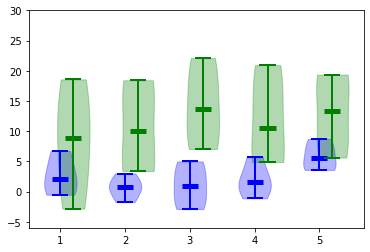

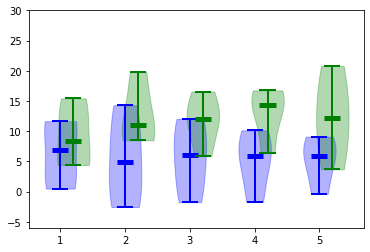

In [2]:
analysis = network_action.local_response(do_pts = ['905','906','907','908'])
analysis.extract_baselines()
analysis.extract_response()
analysis.gen_osc_distr()
analysis.plot_response()

What we see above is that the SCC-LFP does not exhibit statistically significant increases in any of the oscillatory bands (x-axis) under ONTarget stimulation (blue).
OFFTarget, however, does seem to exhibit some statistically significant increases in certain bands.
The only band that exhibits a statistically significant difference is the left-SCC $\alpha$ band.

### Scalp EEG exhibits large changes

Now we turn to the scalp EEG and see whether there are large changes under SCCwm-DBS.

We first analyse the channel-marginalized distributions for each of the oscillatory bands.
We find that there are significant changes in all bands.

### Scalp EEG response is specific to ONTarget

We compare the spatial pattern of $\alpha$ changes between ONTarget and OFFTarget stimulation.


### Parting Thoughts

This work addresses a key need in adaptive DBS by characterizing our ability to control the brain's state, which is necessary for us to be able to go from a starting brain state $x_0$ (associated with depression) to a desired brain state $x_\text{target}$ (associated with health).
